<a href="https://colab.research.google.com/github/srishtikumari03/Mall_Customer_Segmentation/blob/main/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

We are using [Market Customer Segmentation Dataset](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

Using this dataset we want to understand the customers like who can be easily converge (Target Customers) so that the sense can be given to marketing team and plan the strategy accordingly.

We will do this using K-Mean Algorithm, which is an unsupervised algorithm capable of clustering similar this kind of datapoints very quickly and efficiently.

###**Import Libraries**

In [1]:
import pandas as pd  #For data manipulation and analysis
import numpy as np  #For high level mathematical computations and operations
import matplotlib.pyplot as plt #For data visualization
import seaborn as sns  #For drawing attractive and informative statistical graphics.
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.express as px
%matplotlib inline

# Setting Style and Palette for Seaborn Plots
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_palette('Dark2')
sns.set_style("darkgrid", rc=custom_style)

# Hiding All Warnings
import warnings
warnings.filterwarnings('ignore')

#NOTE!!!!
#Plotly charts are not directly visible in GitHub kindly view the same in Jupyter Lab and ensure that Plotly extension for Jupyter Lab is installed


# **Download Data**

In [2]:
!pip install kaggle #Install the Kaggle library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! mkdir ~/.kaggle #Make a directory named “.kaggle”

In [4]:
!cp /content/drive/MyDrive/Mall_Customer_Segmentation/kaggle.json ~/.kaggle/kaggle.json #Copy the “kaggle.json” into this new directory

In [5]:
! chmod 600 ~/.kaggle/kaggle.json #Allocate the required permission for this file.

In [6]:
! kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 1.45MB/s]


In [7]:
! unzip customer-segmentation-tutorial-in-python.zip

Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


# **Load Dataset**

In [8]:
df = pd.read_csv('Mall_Customers.csv')

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **PreProcess Data**

This case requires to **develop a customer segmentation to define marketing strategy**. The

We are owing a supermarket mall and through membership cards , we have some basic data about out customers. Like:
* Customer ID
* age, gender
* annual income
* spending score

Spending Score is something we assign to the customer based on your defined parameters like customer behavior and purchasing data

In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.shape

(200, 5)

In [12]:
for i in df.columns:
  print(f'column: {i}, dtype: {df[i].dtype}')

column: CustomerID, dtype: int64
column: Gender, dtype: object
column: Age, dtype: int64
column: Annual Income (k$), dtype: int64
column: Spending Score (1-100), dtype: int64


**Handling Null Values**

In [13]:
#checking for null values
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Scale Data and Handel Categorical Values**

It is important to scale the input features before running K-Means, or the clusters may be very stretched and K-Means will perform poorly. Scaling the features does not guarantee that all the clusters will be nice and spherical, but it generally improves things.

In [14]:
def encode(data):

  X = data.copy()
  dummies = pd.get_dummies(data['Gender'])
  X[dummies.columns] = dummies

  return X.drop(['Gender'], axis = 1)

In [15]:
X = encode(df)

In [16]:
X.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


**Covariance Matrix**

A covariance matrix is a square matrix giving the covariance between each pair of elements of a given random vector. 

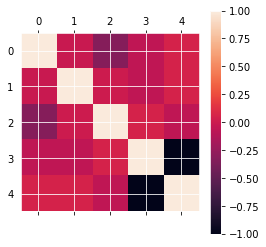

In [17]:
#Plot covariance matrix
X_cov = X.drop(['CustomerID'], axis = 1)
plt.matshow(X_cov.corr())
plt.colorbar()
plt.show()

***INFERENCE***

A high covariance basically indicates there is a **strong relationship between the variables.**

**No two columns in this dataset are strongly related**

# **Customer Segmentation**

This section focuses on the implementation KMeans algorithm. Found the optimal number of clusters using the elbow method and Silhouette Score. 

Then drawing inferences based on the clusters obtained.


In [18]:
from sklearn.cluster import KMeans

In [19]:
X_train = X.drop(['CustomerID'], axis = 1)

#### **Find Optimal value for k(no. of clusters)**

**Elbow Method**

In [20]:
def try_k(X, k):
  kmeans = KMeans(n_clusters=k).fit(X)
  return kmeans.inertia_

Calculating inertia(Mean squared distance between each datapoint and its closest centroid) for different values of k(no. of clusters).

In [21]:
Ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
inertias = []

for k in Ks:
  inertias.append(try_k(X_train, k))

print(inertias)

[308911.34, 212938.71508951404, 143440.43314900764, 104463.19922884133, 75448.45165554191, 58398.902680652696, 51180.900470219436, 44404.73719460616, 40908.923733206444, 37143.56500656433]


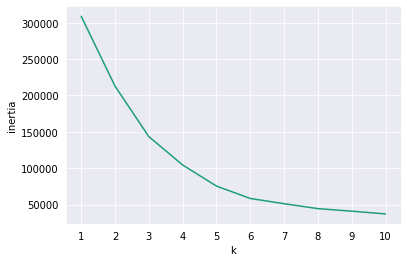

In [22]:
# naming the x axis
plt.xlabel('k')
# naming the y axis
plt.ylabel('inertia')

plt.xticks(Ks)
plt.plot(Ks, inertias)

plt.show()

*INFERENCE*
 * According to the elbow method, k = 5 is optimal number of clusters

**Silhouette Score**

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. 

In [23]:
from sklearn.metrics import silhouette_score #To compute the silhouette score

In [24]:
def try_k_Silhouette(X, k):
  kmeans = KMeans(n_clusters=k).fit(X)
  return silhouette_score(X, kmeans.labels_)

In [25]:
Ks = [2, 3, 4, 5, 6, 7, 8, 9, 10]
scores = []

for k in Ks:
  scores.append(try_k_Silhouette(X_train, k))

print(scores)

[0.29298136996751367, 0.38366377184202277, 0.4051292479311983, 0.44002319863526246, 0.4517762870734356, 0.43764151702658244, 0.42745073613716417, 0.4062416143333115, 0.3832756991783819]


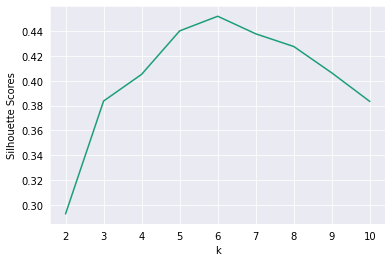

In [26]:
# naming the x axis
plt.xlabel('k')
# naming the y axis
plt.ylabel('Silhouette Scores')

plt.xticks(Ks)
plt.plot(Ks, scores)

plt.show()

*INFERENCE*

**High Silhouette Score = Well clustered**

According to silhouette score, k = 6 is the optimal solution

#### **Final Model**

KMeans uses KMeans++ random initialization by default, so we don't need to worry about it.

In [27]:
#We will use k = 5
model = KMeans(n_clusters = 5)
model.fit(X_train)

KMeans(n_clusters=5)

In [28]:
Clusters = model.predict(X_train)

In [29]:
Clusters = pd.DataFrame(data = Clusters, columns = ['Cluster'])
Clusters['CustomerID'] = X.CustomerID
Clusters.head()

,Cluster,CustomerID
0,3,1
1,4,2
2,3,3
3,4,4
4,3,5


#### **Final Data**

In [30]:
final_data = X.merge(Clusters, on = 'CustomerID', how = 'left')
final_data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male,Cluster
0,1,19,15,39,0,1,3
1,2,21,15,81,0,1,4
2,3,20,16,6,1,0,3
3,4,23,16,77,1,0,4
4,5,31,17,40,1,0,3


**Get Centers**

In [31]:
model.cluster_centers_

array([[43.08860759, 55.29113924, 49.56962025,  0.58227848,  0.41772152],
       [32.69230769, 86.53846154, 82.12820513,  0.53846154,  0.46153846],
       [40.66666667, 87.75      , 17.58333333,  0.47222222,  0.52777778],
       [45.2173913 , 26.30434783, 20.91304348,  0.60869565,  0.39130435],
       [25.52173913, 26.30434783, 78.56521739,  0.60869565,  0.39130435]])

In [32]:
centers = pd.DataFrame(data = model.cluster_centers_, columns = X_train.columns)
centers = centers.rename_axis('center').reset_index()
centers.head()

,center,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,0,43.088608,55.291139,49.569620,0.582278,0.417722
1,1,32.692308,86.538462,82.128205,0.538462,0.461538
2,2,40.666667,87.750000,17.583333,0.472222,0.527778
3,3,45.217391,26.304348,20.913043,0.608696,0.391304
4,4,25.521739,26.304348,78.565217,0.608696,0.391304


**centers** and **final_data** are our final datasets which will help us find target customers and draw inferences.

# **Analyze and Visualize Results**

**Scatter Plot**

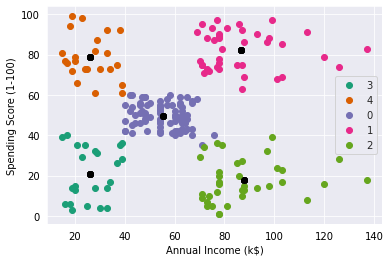

In [33]:
#Getting unique labels
u_labels = final_data['Cluster'].unique()
 
#plotting the results with any two cols on x and y-axis:
for i in u_labels:
  x = final_data[final_data.Cluster == i]['Annual Income (k$)']
  y = final_data[final_data.Cluster == i]['Spending Score (1-100)']
  plt.xlabel('Annual Income (k$)')
  plt.ylabel('Spending Score (1-100)')
  plt.scatter( x,  y, label = i)
  plt.scatter(centers['Annual Income (k$)'], centers['Spending Score (1-100)'], color = 'black')

plt.legend()
plt.show()

**Relation between features**

In [34]:
centers.head()

,center,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,0,43.088608,55.291139,49.569620,0.582278,0.417722
1,1,32.692308,86.538462,82.128205,0.538462,0.461538
2,2,40.666667,87.750000,17.583333,0.472222,0.527778
3,3,45.217391,26.304348,20.913043,0.608696,0.391304
4,4,25.521739,26.304348,78.565217,0.608696,0.391304


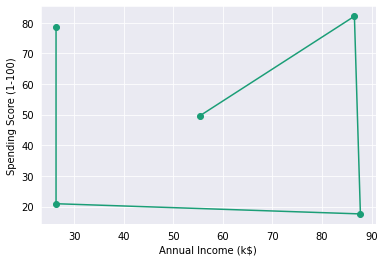

In [35]:
#Line plot with x-axis as Annual Income and y-axis as Spending Score

x = centers['Annual Income (k$)']
y = centers['Spending Score (1-100)']

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.scatter(x, y)
plt.plot(x, y)

plt.show()

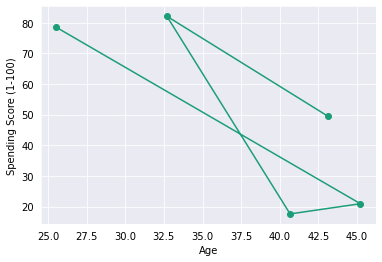

In [36]:
#Line plot with x-axis as Age and y-axis as Spending Score

x = centers['Age']
y = centers['Spending Score (1-100)']

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.scatter(x, y)
plt.plot(x, y)

plt.show()

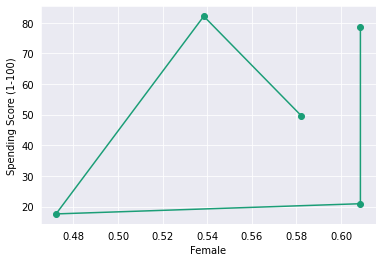

In [37]:
#Line plot with x-axis as Female and y-axis as Spending Score

x = centers['Female']
y = centers['Spending Score (1-100)']

plt.xlabel('Female')
plt.ylabel('Spending Score (1-100)')
plt.scatter(x, y)
plt.plot(x, y)

plt.show()

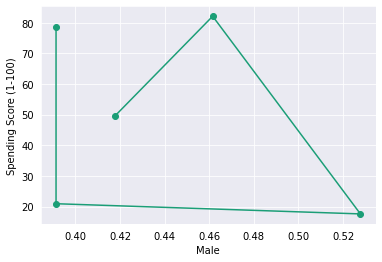

In [38]:
#Line plot with x-axis as Male and y-axis as Spending Score

x = centers['Male']
y = centers['Spending Score (1-100)']

plt.xlabel('Male')
plt.ylabel('Spending Score (1-100)')
plt.scatter(x, y)
plt.plot(x, y)

plt.show()

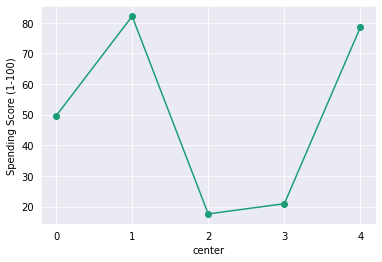

In [39]:
#Line plot with x-axis as center and y-axis as Spending Score

x = centers['center']
y = centers['Spending Score (1-100)']

plt.xticks(centers['center'])
plt.xlabel('center')
plt.ylabel('Spending Score (1-100)')
plt.scatter(x, y)
plt.plot(x, y)

plt.show()

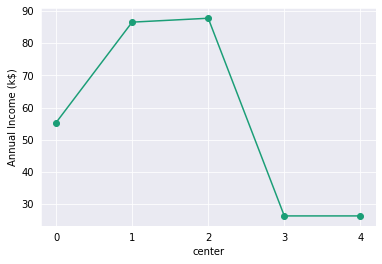

In [40]:
#Line plot with x-axis as center and y-axis as Annual Income (k$)

x = centers['center']
y = centers['Annual Income (k$)']

plt.xticks(centers['center'])
plt.xlabel('center')
plt.ylabel('Annual Income (k$)')
plt.scatter(x, y)
plt.plot(x, y)

plt.show()

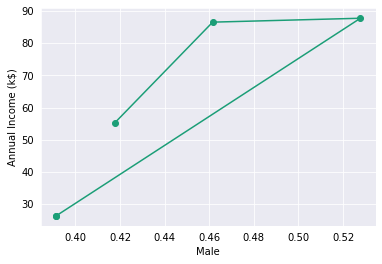

In [41]:
#Line plot with x-axis as Male and y-axis as Annual Income (k$)

x = centers['Male']
y = centers['Annual Income (k$)']

plt.xlabel('Male')
plt.ylabel('Annual Income (k$)')
plt.scatter(x, y)
plt.plot(x, y)

plt.show()

***INFERENCE***

* Mean Spending Score of respective clusters is in order: 3 < 4 < 0 < 2 < 1

* Mean Annual Income of respective clusters is in order: 2 approx equal to 4 < 0 < 1 approx equal to 3

**Customers grouped in cluster 2, earn a minimum but spend a good amount** 
So they are our *1st priority customer lets name as A. category customer*

**Customers grouped in cluster 1, earn maximum and spend maximum** 
So they are our *2nd priority customer lets name as B. category customer*

**Customers grouped in cluster 0, earns average and spends average** 
So they are our *3rd priority customer let's name as C. category customer*

**Customers grouped in cluster 3, earn maximum but spend minimum** 
So they are our *4th priority customer let's name as D. category customer*

**Customers grouped in cluster 4, earn minimum and spend minimum** 
So they are our *5th priority customer let's name as E. category customer*

In [42]:
cluster_priority = {0: 3, 1: 2, 2: 1, 3: 4, 4: 5}
priority_vs_category = {1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E'}